# Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0


In [2]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000,102139.000000
mean,43.517373,82475.652033,127602.232928,574.847404,59.538384,2.500524,13.505639,36.103389,0.500460,0.116958
std,15.002365,38980.759033,70886.218243,158.856907,34.676249,1.116528,6.625293,17.004027,0.231017,0.321372
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48796.000000,66230.000000,437.000000,30.000000,2.000000,7.800000,24.000000,0.300000,0.000000
50%,43.000000,82480.000000,127439.000000,575.000000,59.000000,2.000000,13.470000,36.000000,0.500000,0.000000
75%,57.000000,116182.000000,189274.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149994.000000,249997.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [3]:
data["Default"].value_counts()

,count
Default,
0,90193
1,11946


In [4]:
data.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [5]:
data = data.dropna()

Convert categorical features to dummies. Standardize the data and split into training and testing sets.

In [6]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']
data_vis = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [7]:
data_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,...,False,False,True,True,True,False,False,True,False,False
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,...,False,False,False,True,True,False,True,False,False,True
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,...,False,True,False,True,True,False,True,False,False,True
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,...,False,False,True,False,False,True,False,False,False,True
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,...,True,False,True,False,True,True,False,False,False,True


In [8]:
from sklearn.model_selection import train_test_split

y = data_encoded['Default']
X = data_encoded.drop(columns = ['Default','LoanID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [9]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
62804,21,104118,220520,328,78,3,18.13,36,0.43,False,...,False,True,False,False,True,True,False,False,False,True
61364,53,40531,90122,681,74,2,15.59,60,0.33,False,...,False,True,False,False,False,False,False,True,False,True
85968,53,61800,202657,821,74,4,22.08,36,0.53,False,...,False,False,False,False,True,False,False,True,False,True
54750,57,125545,161778,602,51,1,7.99,24,0.14,True,...,False,True,False,True,True,False,False,False,True,False
99438,38,17563,150199,443,96,3,13.79,36,0.56,False,...,False,False,True,False,False,False,True,False,False,True


In [10]:
print("Train Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Train Set Shape: (91925, 24) (91925,)
Test Set Shape: (10214, 24) (10214,)


# Data Analysis

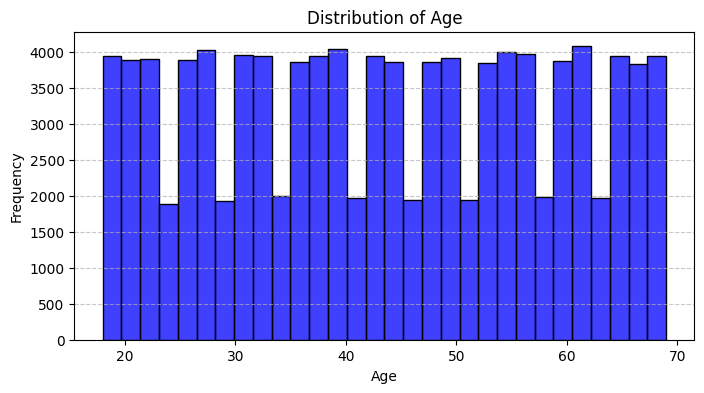

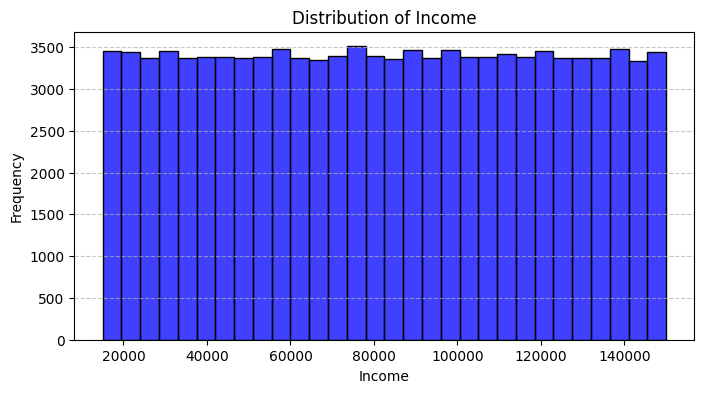

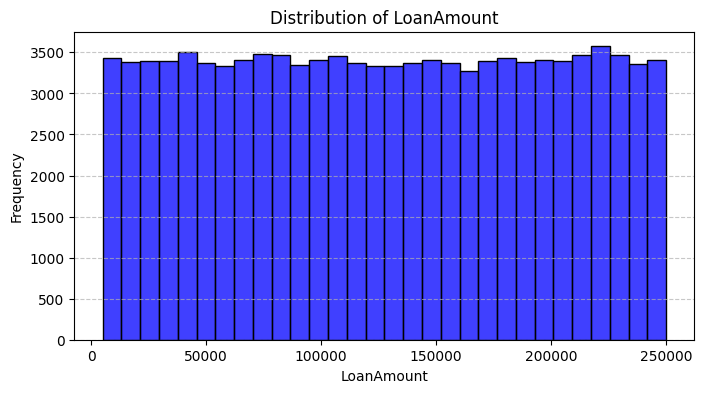

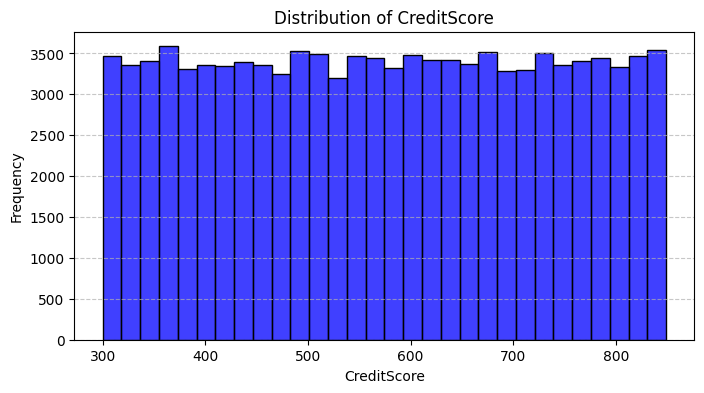

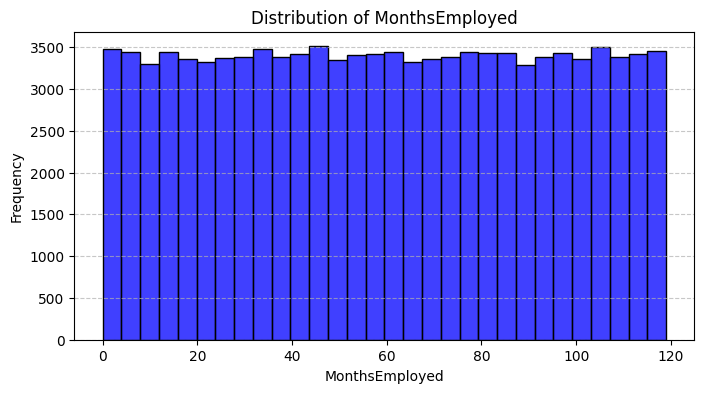

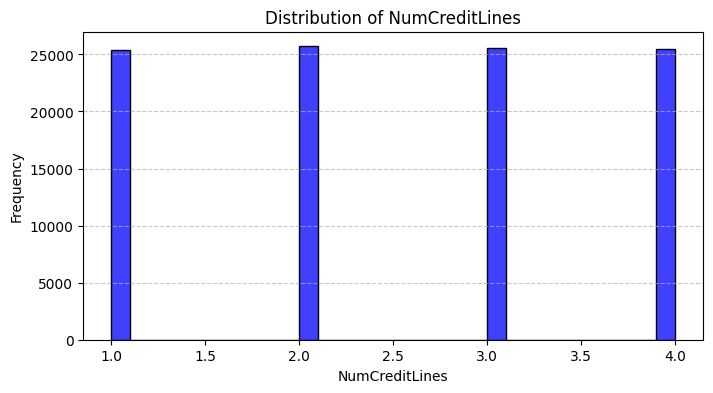

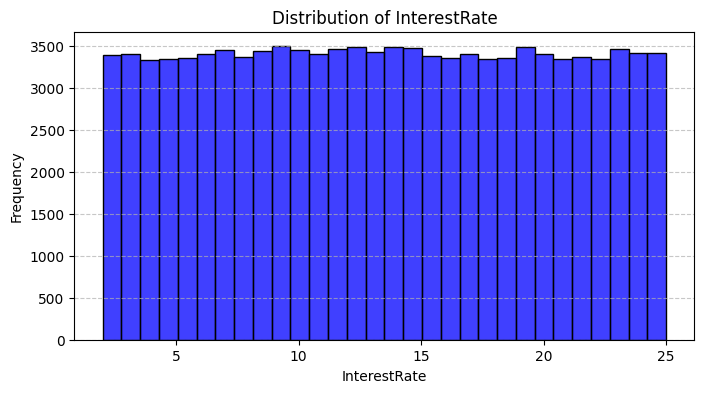

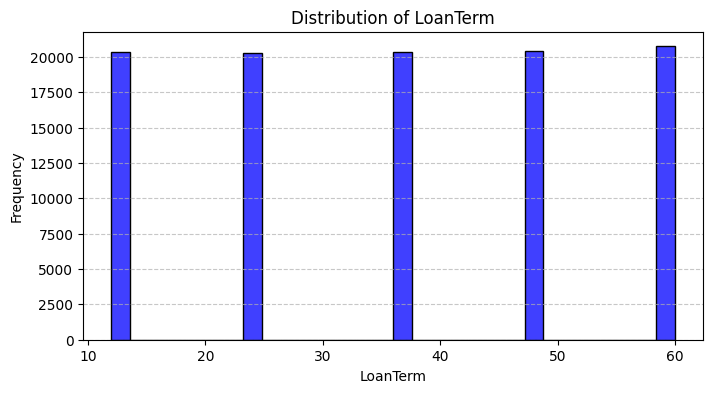

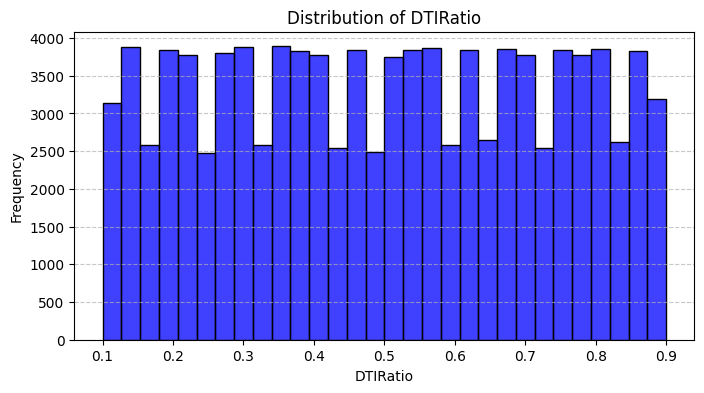

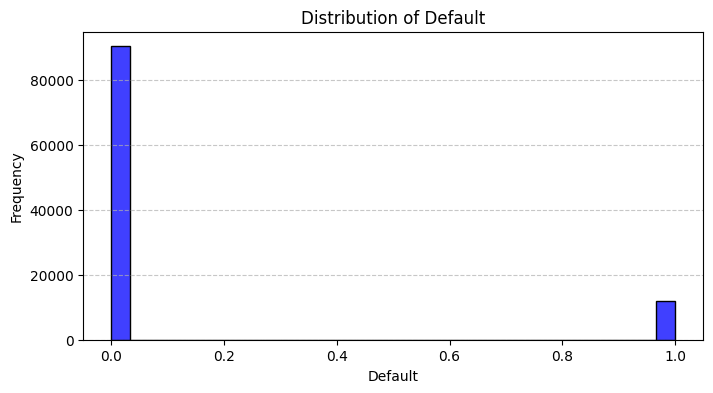

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    "Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed",
    "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio", "Default"
]

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_vis, x=col, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


We can observe that default count is unbalanced, so we will adopt over-sampling to optimize the dataset.

In [38]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())


Before: Default
0    81170
1    10755
Name: count, dtype: int64
After: Default
0    81170
1    81170
Name: count, dtype: int64


In [39]:
numerical_cols = ["Age", "Income", "LoanAmount", "CreditScore",
                  "MonthsEmployed", "NumCreditLines", "InterestRate",
                  "LoanTerm", "DTIRatio"]
dummy_cols = [col for col in X_train_res.columns if col not in numerical_cols]

X_train_numerical = X_train_res[numerical_cols]
X_train_dummy = X_train_res[dummy_cols]

X_test_numerical = X_test[numerical_cols]
X_test_dummy = X_test[dummy_cols]

scaler = StandardScaler()
scaler.fit(X_train_numerical)

X_train_numerical_scaled = scaler.transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

X_train_final = pd.concat([
    pd.DataFrame(X_train_numerical_scaled, columns=numerical_cols, index=X_train_res.index),
    X_train_dummy
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_numerical_scaled, columns=numerical_cols, index=X_test.index),
    X_test_dummy
], axis=1)

print("Training Set:", X_train_final.shape, y_train_res.shape)
print("Testing Set:", X_test_final.shape, y_test.shape)

Training Set: (162340, 24) (162340,)
Testing Set: (10214, 24) (10214,)


In [14]:
X_train_final.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,-1.377678,0.652561,1.201730,-1.629094,0.710242,0.601853,0.579101,0.009154,-0.360420,False,...,False,True,False,False,True,True,False,False,False,True
1,0.907640,-0.928890,-0.635824,0.771044,0.586054,-0.356902,0.165730,1.533884,-0.828990,False,...,False,True,False,False,False,False,False,True,False,True
2,0.907640,-0.399916,0.950007,1.722940,0.586054,1.560608,1.221943,0.009154,0.108150,False,...,False,False,False,False,True,False,False,True,False,True
3,1.193305,1.185465,0.373944,0.233903,-0.128026,-1.315657,-1.071130,-0.753211,-1.719273,True,...,False,True,False,True,True,False,False,False,True,False
4,-0.163603,-1.500120,0.210774,-0.847179,1.269087,0.601853,-0.127211,0.009154,0.248721,False,...,False,False,True,False,False,False,True,False,False,True


# SECTION 1: Machine Learning Benchmark

In [127]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

rf_param_combinations = [
    {"n_estimators": 100, "max_depth": 10, "min_samples_split": 5, "min_samples_leaf": 2, "max_features": "sqrt", "random_state": 42},
    {"n_estimators": 200, "max_depth": 15, "min_samples_split": 10, "min_samples_leaf": 4, "max_features": "log2", "random_state": 42},
    {"n_estimators": 300, "max_depth": 20, "min_samples_split": 5, "min_samples_leaf": 2, "max_features": "sqrt", "random_state": 42}
]

xgb_param_combinations = [
    {"learning_rate": 0.1, "max_depth": 5, "n_estimators": 100, "subsample": 0.8, "colsample_bytree": 0.8, "reg_lambda": 1, "reg_alpha": 0, "random_state": 42},
    {"learning_rate": 0.05, "max_depth": 7, "n_estimators": 200, "subsample": 0.9, "colsample_bytree": 0.7, "reg_lambda": 1.5, "reg_alpha": 0.5, "random_state": 42},
    {"learning_rate": 0.2, "max_depth": 3, "n_estimators": 150, "subsample": 0.7, "colsample_bytree": 0.9, "reg_lambda": 1, "reg_alpha": 0, "random_state": 42}
]

test_results = {}

for i, params in enumerate(rf_param_combinations):
    model_name = f"RandomForest{i+1}"
    model = RandomForestClassifier(**params)
    model.fit(X_train_final, y_train_res)
    y_test_pred_proba = model.predict_proba(X_test_final)[:, 1]
    y_test_pred = model.predict(X_test_final)
    auc = roc_auc_score(y_test, y_test_pred_proba)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    test_results[model_name] = {"Test AUC": auc, "Test F1-Score": f1, "Test Accuracy": accuracy}

for i, params in enumerate(xgb_param_combinations):
    model_name = f"XGBoost{i+1}"
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    model.fit(X_train_final, y_train_res)
    y_test_pred_proba = model.predict_proba(X_test_final)[:, 1]
    y_test_pred = model.predict(X_test_final)
    auc = roc_auc_score(y_test, y_test_pred_proba)
    f1 = f1_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    test_results[model_name] = {"Test AUC": auc, "Test F1-Score": f1, "Test Accuracy": accuracy}

test_results_df = pd.DataFrame(test_results).T

print("Test Set Results:")
print(test_results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:05:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:05:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Results:
               Test AUC  Test F1-Score  Test Accuracy
RandomForest1  0.673504       0.208579       0.815743
RandomForest2  0.692777       0.195354       0.850793
RandomForest3  0.698694       0.162130       0.861367
XGBoost1       0.719621       0.145049       0.879969
XGBoost2       0.721473       0.158038       0.878990
XGBoost3       0.725191       0.144444       0.879381


# Deep Learning Data Preparation

First, we set up dataloaders.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

def data_loarder_prep(X_train_final, y_train_res):
  X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_final, y_train_res, test_size=0.15, random_state=42)

  X_train_split = X_train_split.astype(float)
  X_val_split = X_val_split.astype(float)
  X_test = X_test_final.astype(float)

  X_train_tensor = torch.tensor(X_train_split.values, dtype=torch.float32)
  y_train_tensor = torch.tensor(y_train_split.values, dtype=torch.float32)
  X_val_tensor = torch.tensor(X_val_split.values, dtype=torch.float32)
  y_val_tensor = torch.tensor(y_val_split.values, dtype=torch.float32)
  X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

  train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
  test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

  train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
  test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
  return train_loader, val_loader, test_loader

In [16]:
train_loader, val_loader, test_loader = data_loarder_prep(X_train_final, y_train_res)
train_loader.dataset[0]

(tensor([ 0.1935, -0.6754,  1.2047,  0.7370,  0.0272,  0.6019, -0.2949,  0.7715,
          0.0961,  1.0000,  1.0000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000]),
 tensor(1.))

In [17]:
for X_batch, y_batch in train_loader:
    print("X_batch shape:", X_batch,"\n",X_batch.shape)
    print("y_batch shape:", y_batch,"\n",y_batch.shape)
    break

X_batch shape: tensor([[ 0.7648,  1.2086, -1.1832,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.9789,  1.5577,  0.1360,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1636, -0.6772,  1.5863,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [ 1.6218,  0.5498, -1.8076,  ...,  0.0000,  0.0000,  1.0000],
        [-0.1636,  1.5394,  1.3202,  ...,  1.0000,  0.0000,  1.0000],
        [-0.5921, -0.0294, -1.1149,  ...,  0.0000,  0.0000,  0.0000]]) 
 torch.Size([64, 24])
y_batch shape: tensor([0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1.]) 
 torch.Size([64])


# SECTION 2: Simple MLP Attempt

Second, we start with a simple MLP and see how it works.

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

input_dim = 24
output_dim = 1

class MLP(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)

        self.fc2 = nn.Linear(32, 64)
        self.bn2 = nn.BatchNorm1d(64)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)

        self.fc4 = nn.Linear(32, 16)
        self.bn4 = nn.BatchNorm1d(16)

        self.fc5 = nn.Linear(16, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.bn1(x)

        x = self.fc2(x)
        x = F.relu(x)
        x = self.bn2(x)

        x = self.fc3(x)
        x = F.relu(x)
        x = self.bn3(x)

        x = self.fc4(x)
        x = F.relu(x)
        x = self.bn4(x)

        x = self.fc5(x)
        x = torch.sigmoid(x)

        return x

We define training and ploting functions for later use.

In [36]:
from sklearn.metrics import roc_auc_score
import copy
import matplotlib.pyplot as plt

def train_model(model,
                train_loader,
                val_loader,
                criterion,
                optimizer,
                device='cpu',
                epochs=20,
                print_flag=True,
                scheduler=None,
                name = ""):
    model = model.to(device)
    best_auc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    train_losses = []
    val_losses = []
    val_aucs = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1).float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * X_batch.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        val_running_loss = 0.0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val = X_val.to(device)
                y_val = y_val.to(device)

                val_outputs = model(X_val)
                v_loss = criterion(val_outputs, y_val.unsqueeze(1).float())
                val_running_loss += v_loss.item() * X_val.size(0)

                all_preds.extend(val_outputs.cpu().numpy().flatten().tolist())
                all_labels.extend(y_val.cpu().numpy().flatten().tolist())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        epoch_val_auc = roc_auc_score(all_labels, all_preds)
        val_aucs.append(epoch_val_auc)

        if epoch_val_auc > best_auc:
            best_auc = epoch_val_auc
            best_model_wts = copy.deepcopy(model.state_dict())

        if print_flag:
            print(f"Epoch [{epoch+1}/{epochs}] "
                  f"Train Loss: {epoch_train_loss:.4f} "
                  f"Val Loss: {epoch_val_loss:.4f} "
                  f"Val AUC: {epoch_val_auc:.4f}")

        if scheduler is not None:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(epoch_val_loss)
            else:
                scheduler.step()

    model.load_state_dict(best_model_wts)
    best_model = copy.deepcopy(model)
    torch.save(best_model.state_dict(), f"best_model_{name}.pth")

    history = {
        'train_loss': train_losses,
        'val_loss': val_losses,
        'val_auc': val_aucs
    }

    return best_model, history


def plot_training(history):
    epochs = range(1, len(history['train_loss']) + 1)

    one_minus_val_auc = [1 - x for x in history['val_auc']]

    plt.figure()

    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    #plt.plot(epochs, one_minus_val_auc, label='1 - Val AUC')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

Using device: cuda
Epoch [1/100] Train Loss: 0.3309 Val Loss: 0.2816 Val AUC: 0.9413
Epoch [2/100] Train Loss: 0.2858 Val Loss: 0.2675 Val AUC: 0.9457
Epoch [3/100] Train Loss: 0.2727 Val Loss: 0.2593 Val AUC: 0.9479
Epoch [4/100] Train Loss: 0.2685 Val Loss: 0.2597 Val AUC: 0.9479
Epoch [5/100] Train Loss: 0.2652 Val Loss: 0.2600 Val AUC: 0.9489
Epoch [6/100] Train Loss: 0.2636 Val Loss: 0.2590 Val AUC: 0.9490
Epoch [7/100] Train Loss: 0.2617 Val Loss: 0.2546 Val AUC: 0.9494
Epoch [8/100] Train Loss: 0.2597 Val Loss: 0.2566 Val AUC: 0.9491
Epoch [9/100] Train Loss: 0.2582 Val Loss: 0.2548 Val AUC: 0.9493
Epoch [10/100] Train Loss: 0.2571 Val Loss: 0.2546 Val AUC: 0.9491
Epoch [11/100] Train Loss: 0.2565 Val Loss: 0.2537 Val AUC: 0.9500
Epoch [12/100] Train Loss: 0.2565 Val Loss: 0.2555 Val AUC: 0.9494
Epoch [13/100] Train Loss: 0.2556 Val Loss: 0.2553 Val AUC: 0.9495
Epoch [14/100] Train Loss: 0.2541 Val Loss: 0.2533 Val AUC: 0.9494
Epoch [15/100] Train Loss: 0.2541 Val Loss: 0.2550 V

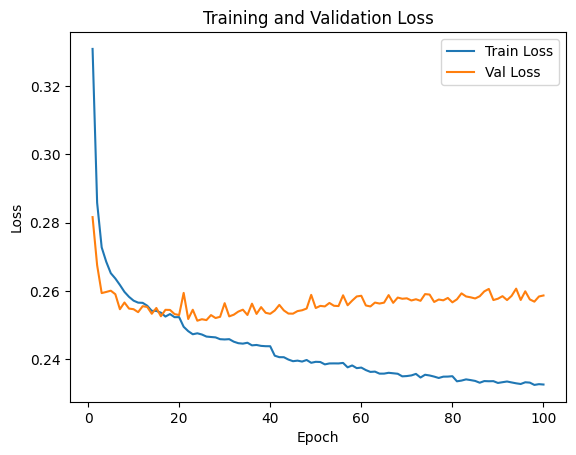

In [37]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model = MLP(input_dim, output_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)

best_model, history = train_model(model=model,
                                  train_loader=train_loader,
                                  val_loader=val_loader,
                                  criterion=criterion,
                                  optimizer=optimizer,
                                  device=device,
                                  epochs=100,
                                  print_flag=True,
                                  scheduler=scheduler,
                                  name = "mlp"
                                  )
plot_training(history)

In [132]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
best_model.load_state_dict(torch.load("best_model_mlp.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model.to(device)
best_model.eval()

all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = best_model(X_batch)
        preds = (outputs >= 0.5).int().squeeze(1)
        all_preds.extend(preds.tolist())
        all_labels.extend(y_batch.tolist())
        all_probs.extend(outputs.squeeze(1).tolist())

acc = accuracy_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_probs)
f1 = f1_score(all_labels, all_preds)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"Test F1-score: {f1:.4f}")

<ipython-input-132-bf0b7df5127d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_model_mlp.pth"))


Test Accuracy: 0.8595
Test AUC: 0.7174
Test F1-score: 0.2281


# SECTION 3: ResNet Attempt

In [24]:
input_dim = 24
output_dim = 1
class DeepResNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims=[32, 64, 128, 256, 128, 64, 32], dropout_rate=0.2):
        super(DeepResNet, self).__init__()

        self.input_layer = nn.Linear(input_dim, hidden_dims[0])
        self.input_bn = nn.BatchNorm1d(hidden_dims[0])

        self.residual_blocks = nn.ModuleList()
        for i in range(1, len(hidden_dims)):
            self.residual_blocks.append(
                ResidualBlock(hidden_dims[i-1], hidden_dims[i], dropout_rate)
            )

        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)

        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # He initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = F.leaky_relu(self.input_bn(self.input_layer(x)))

        for block in self.residual_blocks:
            x = block(x)

        x = self.output_layer(x)
        x = torch.sigmoid(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, input_dim, output_dim, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.bn1 = nn.BatchNorm1d(output_dim)
        self.fc2 = nn.Linear(output_dim, output_dim)
        self.bn2 = nn.BatchNorm1d(output_dim)
        self.dropout = nn.Dropout(dropout_rate)

        self.projection = nn.Linear(input_dim, output_dim) if input_dim != output_dim else None

    def forward(self, x):
        residual = x
        if self.projection is not None:
            residual = self.projection(x)

        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x += residual
        return x


Grid search training (Do not run since it takes more than 6 hours)

Next, we are going try and traverse through more hyperparameters of ResNet and see what is the best combination. Note that we already use the optimized hyperparameters above based on the result below

In [139]:
from itertools import product
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

hidden_dims_grid = [
    [32, 32, 64, 64, 128, 64, 64, 32, 32],
    [32, 64, 128, 256, 128, 64, 32],
    [32, 64, 128, 64, 32],
]
dropout_rate_grid = [0.2, 0.3]
weight_decay_grid = [1e-5, 1e-4]
index = 0
history_list = []

for hidden_dims, dropout_rate, weight_decay in product(hidden_dims_grid, dropout_rate_grid, weight_decay_grid):
    print(f"Testing configuration: hidden_dims={hidden_dims}, dropout_rate={dropout_rate}, weight_decay={weight_decay}")


    model = DeepResNet(input_dim=24, output_dim=1, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)


    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

    try:
        best_model, history = train_model(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            epochs=100,
            print_flag=False,
            scheduler=scheduler,
            name = f"resnet_{index}"
        )
        history_list.append(history)

        best_model.to(device)
        best_model.eval()

        all_preds = []
        all_labels = []
        all_probs = []

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                outputs = best_model(X_batch)


                preds = (outputs >= 0.5).int().squeeze(1)

                all_preds.extend(preds.tolist())
                all_labels.extend(y_batch.tolist())
                all_probs.extend(outputs.squeeze(1).tolist())

        acc = accuracy_score(all_labels, all_preds)
        auc = roc_auc_score(all_labels, all_probs)
        f1 = f1_score(all_labels, all_preds)
        print(f"Test Accuracy for this configuration: {acc:.4f}")
        print(f"Test AUC for this configuration: {auc:.4f}")
        print(f"Test F1 Score for this configuration: {f1:.4f}")

    except Exception as e:
        print(f"Error with configuration: hidden_dims={hidden_dims}, dropout_rate={dropout_rate}, weight_decay={weight_decay}")
        print(str(e))
    index += 1


Testing configuration: hidden_dims=[32, 32, 64, 64, 128, 64, 64, 32, 32], dropout_rate=0.2, weight_decay=1e-05
Test Accuracy for this configuration: 0.8656
Test AUC for this configuration: 0.7191
Test F1 Score for this configuration: 0.2068
Testing configuration: hidden_dims=[32, 32, 64, 64, 128, 64, 64, 32, 32], dropout_rate=0.2, weight_decay=0.0001
Test Accuracy for this configuration: 0.8655
Test AUC for this configuration: 0.7231
Test F1 Score for this configuration: 0.2067
Testing configuration: hidden_dims=[32, 32, 64, 64, 128, 64, 64, 32, 32], dropout_rate=0.3, weight_decay=1e-05
Test Accuracy for this configuration: 0.8614
Test AUC for this configuration: 0.7178
Test F1 Score for this configuration: 0.1945
Testing configuration: hidden_dims=[32, 32, 64, 64, 128, 64, 64, 32, 32], dropout_rate=0.3, weight_decay=0.0001
Test Accuracy for this configuration: 0.8643
Test AUC for this configuration: 0.7211
Test F1 Score for this configuration: 0.2257
Testing configuration: hidden_dims

 Let's fix drop out rate and weight-decay to save more time and try a decreasing-increasing structure and longer structure without dimension change.

In [140]:
from itertools import product
import torch.nn as nn
import torch.optim as optim

hidden_dims_grid = [
    [64, 32, 16, 32, 64],
    [64, 32, 16, 8, 16, 32, 64],
    [128, 64, 32, 16, 32, 64],
    [32, 32, 32, 32, 32, 32, 32, 32, 32]
]
dropout_rate_grid = [0.2]
weight_decay_grid = [1e-4]

for hidden_dims, dropout_rate, weight_decay in product(hidden_dims_grid, dropout_rate_grid, weight_decay_grid):
    print(f"Testing configuration: hidden_dims={hidden_dims}, dropout_rate={dropout_rate}, weight_decay={weight_decay}")

    model = DeepResNet(input_dim=24, output_dim=1, hidden_dims=hidden_dims, dropout_rate=dropout_rate).to(device)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

    try:
        best_model, history = train_model(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            epochs=70,
            print_flag=False,
            scheduler=scheduler,
        )

        best_model.to(device)
        best_model.eval()

        all_preds = []
        all_labels = []
        all_probs = []

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                outputs = best_model(X_batch)

                preds = (outputs >= 0.5).int().squeeze(1)

                all_preds.extend(preds.tolist())
                all_labels.extend(y_batch.tolist())
                all_probs.extend(outputs.squeeze(1).tolist())

        acc = accuracy_score(all_labels, all_preds)
        auc = roc_auc_score(all_labels, all_probs)
        f1 = f1_score(all_labels, all_preds)
        print(f"Test Accuracy for this configuration: {acc:.4f}")
        print(f"Test AUC for this configuration: {auc:.4f}")
        print(f"Test F1 Score for this configuration: {f1:.4f}")

    except Exception as e:
        print(f"Error with configuration: hidden_dims={hidden_dims}, dropout_rate={dropout_rate}, weight_decay={weight_decay}")
        print(str(e))


Testing configuration: hidden_dims=[64, 32, 16, 32, 64], dropout_rate=0.2, weight_decay=0.0001
Test Accuracy for this configuration: 0.8617
Test AUC for this configuration: 0.7221
Test F1 Score for this configuration: 0.1930
Testing configuration: hidden_dims=[64, 32, 16, 8, 16, 32, 64], dropout_rate=0.2, weight_decay=0.0001
Test Accuracy for this configuration: 0.8682
Test AUC for this configuration: 0.7194
Test F1 Score for this configuration: 0.2026
Testing configuration: hidden_dims=[128, 64, 32, 16, 32, 64], dropout_rate=0.2, weight_decay=0.0001
Test Accuracy for this configuration: 0.8585
Test AUC for this configuration: 0.7117
Test F1 Score for this configuration: 0.2168
Testing configuration: hidden_dims=[32, 32, 32, 32, 32, 32], dropout_rate=0.2, weight_decay=0.0001
Test Accuracy for this configuration: 0.8567
Test AUC for this configuration: 0.7170
Test F1 Score for this configuration: 0.2188


Overall, we decide to use:
*   hidden_dims: [32, 64, 128, 256, 128, 64, 32]
*   dropout_rate: 0.2
*   weight_decay: 0.0001

with metric:
*   Test Accuracy: 0.8662
*   Test AUC: 0.7232
*   Test F1 Score: 0.1982


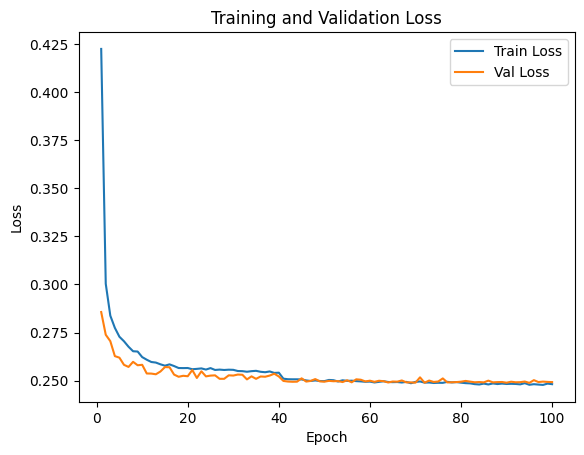

In [27]:
plot_training(history_list[5])

We find that F1 score is low, so we are going to try different threshold below.

Best Accuracy Threshold: 0.83, Accuracy: 0.8832
Best F1-Score Threshold: 0.23, F1-Score: 0.3286
AUC: 


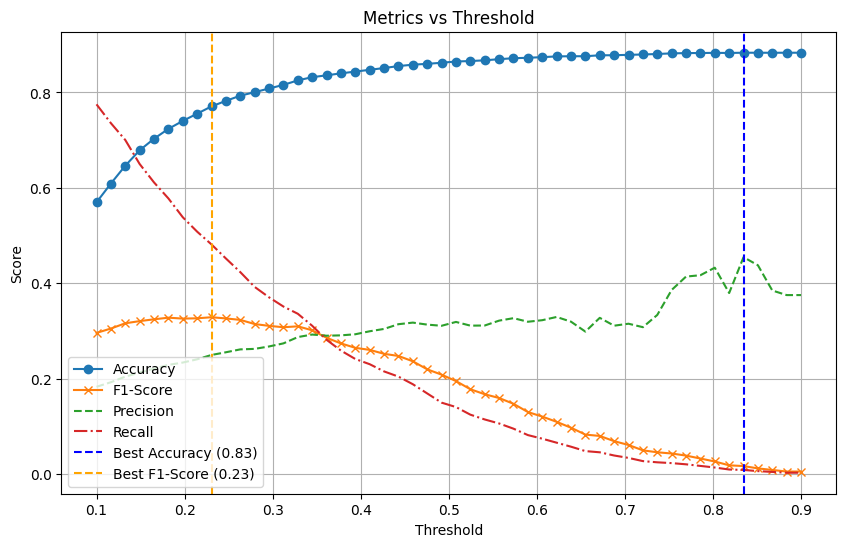

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model.to(device)
best_model.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = best_model(X_batch)

        all_probs.extend(outputs.squeeze(1).tolist())
        all_labels.extend(y_batch.tolist())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

thresholds = np.linspace(0.1, 0.9, 50)

accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
auc_value = roc_auc_score(all_labels, all_probs)

for threshold in thresholds:
    preds = (all_probs >= threshold).astype(int)
    accuracy_list.append(accuracy_score(all_labels, preds))
    f1_list.append(f1_score(all_labels, preds))
    precision_list.append(precision_score(all_labels, preds, zero_division=0))
    recall_list.append(recall_score(all_labels, preds))

best_accuracy_threshold = thresholds[np.argmax(accuracy_list)]
best_f1_threshold = thresholds[np.argmax(f1_list)]

print(f"Best Accuracy Threshold: {best_accuracy_threshold:.2f}, Accuracy: {max(accuracy_list):.4f}")
print(f"Best F1-Score Threshold: {best_f1_threshold:.2f}, F1-Score: {max(f1_list):.4f}")
print(f"AUC: ")

results_df = pd.DataFrame({
    "Threshold": thresholds,
    "Accuracy": accuracy_list,
    "F1-Score": f1_list,
    "Precision": precision_list,
    "Recall": recall_list
})

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label="Accuracy", marker='o')
plt.plot(thresholds, f1_list, label="F1-Score", marker='x')
plt.plot(thresholds, precision_list, label="Precision", linestyle='--')
plt.plot(thresholds, recall_list, label="Recall", linestyle='-.')
plt.axvline(best_accuracy_threshold, color='blue', linestyle='--', label=f"Best Accuracy ({best_accuracy_threshold:.2f})")
plt.axvline(best_f1_threshold, color='orange', linestyle='--', label=f"Best F1-Score ({best_f1_threshold:.2f})")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Metrics vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [42]:
complete_data = [
    {"hidden_dims": "[32, 32, 64, 64, 128, 64, 64, 32, 32]", "dropout_rate": 0.2, "weight_decay": 1e-05, "accuracy": 0.8656, "auc": 0.7191, "f1_score": 0.2068},
    {"hidden_dims": "[32, 32, 64, 64, 128, 64, 64, 32, 32]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8655, "auc": 0.7231, "f1_score": 0.2067},
    {"hidden_dims": "[64, 32, 16, 32, 64]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8617, "auc": 0.7221, "f1_score": 0.1930},
    {"hidden_dims": "[64, 32, 16, 8, 16, 32, 64]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8682, "auc": 0.7194, "f1_score": 0.2026},
    {"hidden_dims": "[128, 64, 32, 16, 32, 64]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8585, "auc": 0.7117, "f1_score": 0.2168},
    {"hidden_dims": "[32, 32, 32, 32, 32, 32]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8567, "auc": 0.7170, "f1_score": 0.2188},
    {"hidden_dims": "[32, 32, 64, 64, 128, 64, 64, 32, 32]", "dropout_rate": 0.3, "weight_decay": 1e-05, "accuracy": 0.8614, "auc": 0.7178, "f1_score": 0.1945},
    {"hidden_dims": "[32, 32, 64, 64, 128, 64, 64, 32, 32]", "dropout_rate": 0.3, "weight_decay": 0.0001, "accuracy": 0.8643, "auc": 0.7211, "f1_score": 0.2257},
    {"hidden_dims": "[32, 64, 128, 256, 128, 64, 32]", "dropout_rate": 0.2, "weight_decay": 1e-05, "accuracy": 0.8581, "auc": 0.7138, "f1_score": 0.2197},
    {"hidden_dims": "[32, 64, 128, 256, 128, 64, 32]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8662, "auc": 0.7232, "f1_score": 0.1982},
    {"hidden_dims": "[32, 64, 128, 256, 128, 64, 32]", "dropout_rate": 0.3, "weight_decay": 1e-05, "accuracy": 0.8627, "auc": 0.7192, "f1_score": 0.1961},
    {"hidden_dims": "[32, 64, 128, 256, 128, 64, 32]", "dropout_rate": 0.3, "weight_decay": 0.0001, "accuracy": 0.8618, "auc": 0.7212, "f1_score": 0.2182},
    {"hidden_dims": "[32, 64, 128, 64, 32]", "dropout_rate": 0.2, "weight_decay": 1e-05, "accuracy": 0.8603, "auc": 0.7185, "f1_score": 0.2172},
    {"hidden_dims": "[32, 64, 128, 64, 32]", "dropout_rate": 0.2, "weight_decay": 0.0001, "accuracy": 0.8608, "auc": 0.7204, "f1_score": 0.2074},
    {"hidden_dims": "[32, 64, 128, 64, 32]", "dropout_rate": 0.3, "weight_decay": 1e-05, "accuracy": 0.8644, "auc": 0.7200, "f1_score": 0.2126},
    {"hidden_dims": "[32, 64, 128, 64, 32]", "dropout_rate": 0.3, "weight_decay": 0.0001, "accuracy": 0.8650, "auc": 0.7195, "f1_score": 0.2160},
]

# Create a complete DataFrame
complete_df = pd.DataFrame(complete_data)

# Display the complete table to the user

complete_df
# export complete_df as csv


,hidden_dims,dropout_rate,weight_decay,accuracy,auc,f1_score
0,"[32, 32, 64, 64, 128, 64, 64, 32, 32]",0.2,0.00001,0.8656,0.7191,0.2068
1,"[32, 32, 64, 64, 128, 64, 64, 32, 32]",0.2,0.00010,0.8655,0.7231,0.2067
2,"[64, 32, 16, 32, 64]",0.2,0.00010,0.8617,0.7221,0.1930
3,"[64, 32, 16, 8, 16, 32, 64]",0.2,0.00010,0.8682,0.7194,0.2026
4,"[128, 64, 32, 16, 32, 64]",0.2,0.00010,0.8585,0.7117,0.2168
5,"[32, 32, 32, 32, 32, 32]",0.2,0.00010,0.8567,0.7170,0.2188
6,"[32, 32, 64, 64, 128, 64, 64, 32, 32]",0.3,0.00001,0.8614,0.7178,0.1945
7,"[32, 32, 64, 64, 128, 64, 64, 32, 32]",0.3,0.00010,0.8643,0.7211,0.2257
8,"[32, 64, 128, 256, 128, 64, 32]",0.2,0.00001,0.8581,0.7138,0.2197
9,"[32, 64, 128, 256, 128, 64, 32]",0.2,0.00010,0.8662,0.7232,0.1982
